___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [173]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [174]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [175]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 
Shape of y_train is {} 
Shape of y_train is {} 
'''.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 
Shape of y_train is (60000,) 
Shape of y_train is (10000,) 



**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [176]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

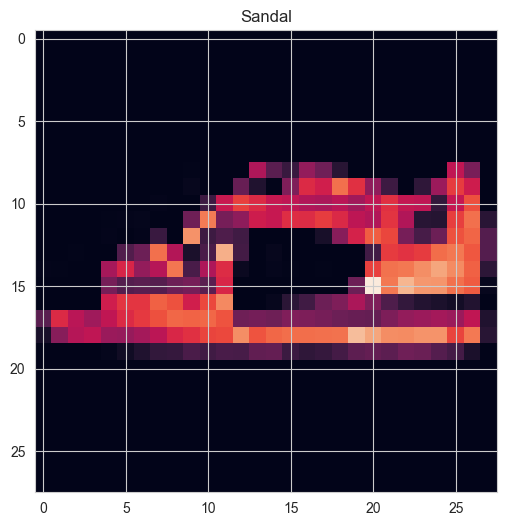

In [177]:
plt.imshow(x_train[13])
plt.title(classes[y_train[13]])
plt.show()

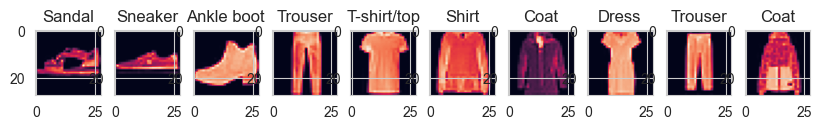

In [178]:
start , end = 13 , 23
for i in range(start, end):
    plt.subplot(1, end - start, i - start+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i]])

plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [179]:
print(
    '''
    Max Values Train : {}
    Min Values Train : {}

    '''.format(x_train.max(),x_train.min())
)


    Max Values Train : 255
    Min Values Train : 0

    


In [180]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [288]:
print(
    '''
    Max Values Train : {}
    Min Values Train : {}

    '''.format(x_train.max(),x_train.min())
)


    Max Values Train : 1.0
    Min Values Train : 0.0

    


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [181]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(x_train.shape, x_test.shape)
)


Shape of x_train is (60000, 28, 28) 
Shape of x_test is (10000, 28, 28) 




In [182]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [183]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(x_train.shape, x_test.shape)
)


Shape of x_train is (60000, 28, 28, 1) 
Shape of x_test is (10000, 28, 28, 1) 




**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [184]:
from tensorflow.keras.utils import to_categorical

In [185]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(y_train[13], y_test[13])
)


Shape of x_train is 5 
Shape of x_test is 3 




In [186]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [187]:
print('''
Shape of x_train is {} 
Shape of x_test is {} 

'''.format(y_train[13], y_test[13])
)


Shape of x_train is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Shape of x_test is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 




# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [190]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [191]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 4732)              0         
                                                                 
 dense_58 (Dense)            (None, 128)               605824    
                                                                 
 dense_59 (Dense)            (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_______________________________________________

In [205]:
########## Trying ###########
# Add dropout with a dropout rate of 0.3
# Adding a extra hidden layers to see the preformanc of it 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential()

# Convolutional Layer
model1.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())

# Fully Connected Layers
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))  
model1.add(Dense(64, activation='relu')) # Added to see the results
model1.add(Dropout(0.3))  

# Output Layer
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [208]:
model1.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 4732)              0         
                                                                 
 dense_65 (Dense)            (None, 128)               605824    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                     

In [209]:

########## Trying ###########
# changed the fillter size and added a one more layer in Conv
model2 = Sequential()

# First Convolutional Layer
model2.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

# Second Convolutional Layer 
model2.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [210]:
model2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 7, 7, 32)        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [192]:
from tensorflow.keras.callbacks import EarlyStopping

In [193]:
early_stop = EarlyStopping(monitor='val_loss', mode="max",patience=4 ,restore_best_weights = True)


In [194]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4025 - accuracy: 0.8566 - val_loss: 0.3163 - val_accuracy: 0.8861
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2702 - accuracy: 0.9022 - val_loss: 0.3226 - val_accuracy: 0.8807
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2302 - accuracy: 0.9168 - val_loss: 0.2624 - val_accuracy: 0.9047
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2037 - accuracy: 0.9258 - val_loss: 0.2661 - val_accuracy: 0.9026
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1829 - accuracy: 0.9331 - val_loss: 0.2703 - val_accuracy: 0.9046
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1671 - accuracy: 0.9394 - val_loss: 0.2889 - val_accuracy: 0.8968


In [211]:
model1.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5034 - accuracy: 0.8256 - val_loss: 0.3704 - val_accuracy: 0.8732
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3563 - accuracy: 0.8787 - val_loss: 0.3408 - val_accuracy: 0.8863
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3333 - accuracy: 0.8871 - val_loss: 0.3278 - val_accuracy: 0.8914
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3273 - accuracy: 0.8899 - val_loss: 0.3396 - val_accuracy: 0.8856
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3246 - accuracy: 0.8936 - val_loss: 0.3151 - val_accuracy: 0.8956


In [212]:
model2.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 21s 10ms/step - loss: 0.5984 - accuracy: 0.7840 - val_loss: 0.3914 - val_accuracy: 0.8610
Epoch 2/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4103 - accuracy: 0.8545 - val_loss: 0.3252 - val_accuracy: 0.8836
Epoch 3/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3780 - accuracy: 0.8674 - val_loss: 0.3082 - val_accuracy: 0.8952
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3700 - accuracy: 0.8727 - val_loss: 0.3130 - val_accuracy: 0.8934
Epoch 5/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3672 - accuracy: 0.8732 - val_loss: 0.3368 - val_accuracy: 0.8918


**TASK 7: Plot values of metrics you used in your model.**

In [214]:
loss_df = pd.DataFrame(model.history.history)
loss_df1 = pd.DataFrame(model1.history.history)
loss_df2 = pd.DataFrame(model2.history.history)

In [220]:

# Vanilla Model (the least requirements)
print('--------- Vanilla Model (the least requirements) ---------')
print(loss_df.head())

# Model with 2 Hidden Layers
print('--------- Model with 2 Hidden Layers ---------')
print(loss_df1.head())

# Model with 2 Convolutional Layers
print('--------- Model with 2 Convolutional Layers ---------')
print(loss_df2.head())


--------- Vanilla Model (the least requirements) ---------
   loss  accuracy  val_loss  val_accuracy
0 0.402     0.857     0.316         0.886
1 0.270     0.902     0.323         0.881
2 0.230     0.917     0.262         0.905
3 0.204     0.926     0.266         0.903
4 0.183     0.933     0.270         0.905
--------- Model with 2 Hidden Layers ---------
   loss  accuracy  val_loss  val_accuracy
0 0.503     0.826     0.370         0.873
1 0.356     0.879     0.341         0.886
2 0.333     0.887     0.328         0.891
3 0.327     0.890     0.340         0.886
4 0.325     0.894     0.315         0.896
--------- Model with 2 Convolutional Layers ---------
   loss  accuracy  val_loss  val_accuracy
0 0.598     0.784     0.391         0.861
1 0.410     0.855     0.325         0.884
2 0.378     0.867     0.308         0.895
3 0.370     0.873     0.313         0.893
4 0.367     0.873     0.337         0.892


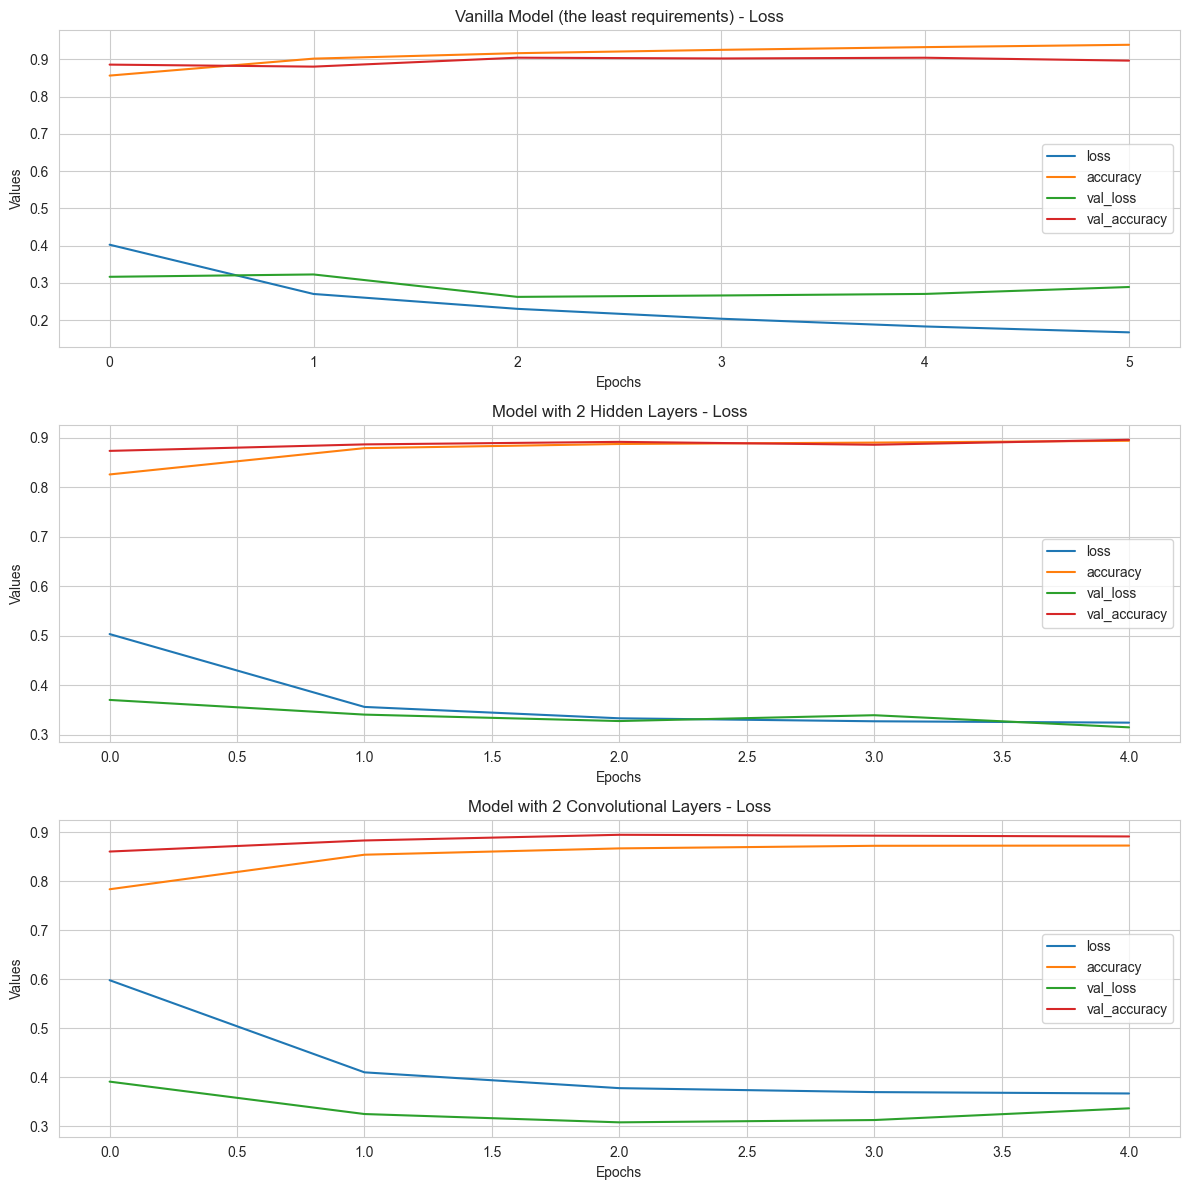

In [225]:
# Create a list of dataframes and their corresponding names
model_data = [(loss_df, 'Vanilla Model (the least requirements)'),
              (loss_df1, 'Model with 2 Hidden Layers'),
              (loss_df2, 'Model with 2 Convolutional Layers')]

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for i, (model_df, model_name) in enumerate(model_data):
    model_df.plot(ax=axes[i])
    axes[i].set_title(f'{model_name} - Loss')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()


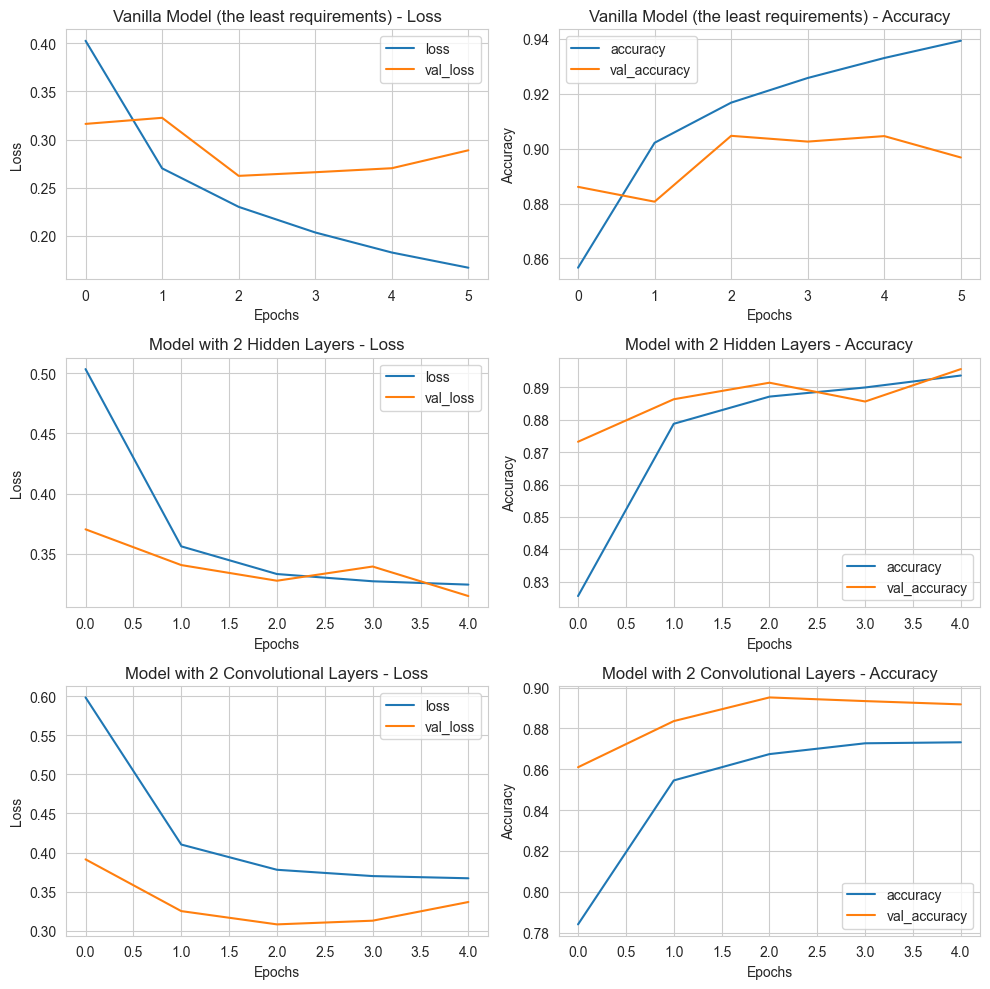

In [228]:
# Create a list of dataframes and their right  names
model_data = [(loss_df, 'Vanilla Model (the least requirements)'),
              (loss_df1, 'Model with 2 Hidden Layers'),
              (loss_df2, 'Model with 2 Convolutional Layers')]

# Create subplots for each model
fig, axes = plt.subplots(len(model_data), 2, figsize=(10, 10))

for i, (model_df, model_name) in enumerate(model_data):
    # Plot loss
    model_df[['loss', 'val_loss']].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{model_name} - Loss')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')

    # Plot accuracy
    model_df[['accuracy', 'val_accuracy']].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'{model_name} - Accuracy')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()


### As conclution 
 - We can see for the first model that we have some overfitting for when we check the curve if the accuracy and compare between the train and Val
 - the second one is the best one regarding the comparing the results 
 - also the third one is good has regarding the curv of the figure 

<Axes: >

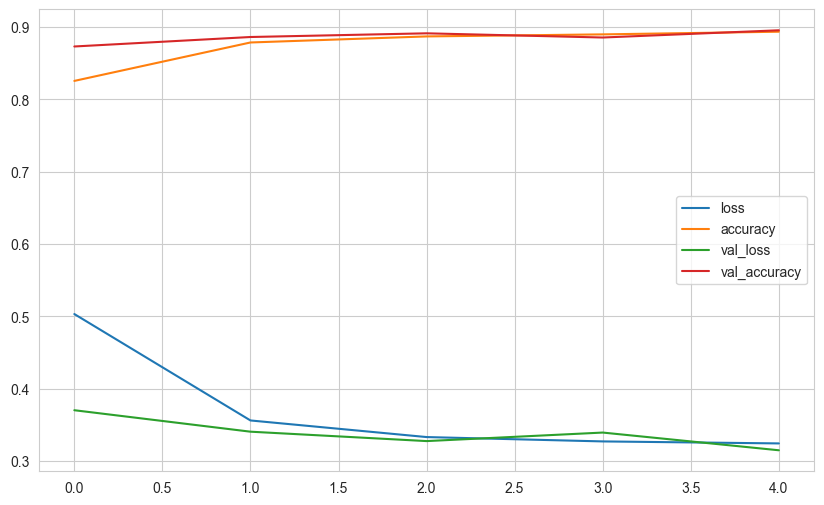

In [229]:
loss_df1.plot()

<Axes: >

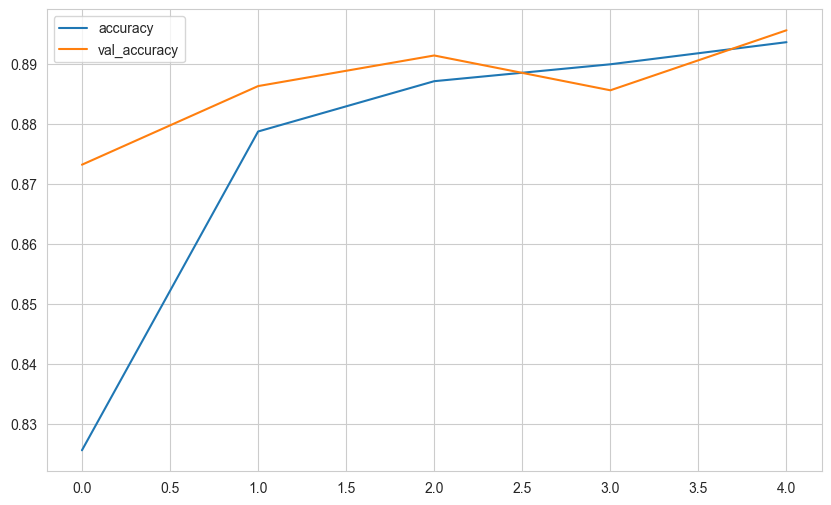

In [230]:
loss_df1[['accuracy','val_accuracy']].plot()

<Axes: >

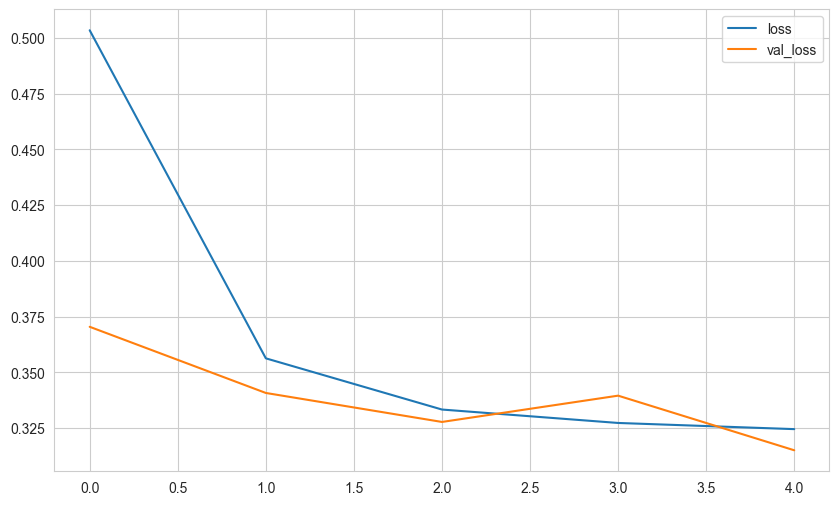

In [231]:
loss_df1[['loss','val_loss']].plot()


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [258]:
########## Trying function ##########
# from sklearn.metrics import classification_report

# def evaluate_model(model, x_train, y_train, x_test, y_test, classes):
#     test_loss, test_accuracy = model.evaluate(x_test, y_test)
#     print(f"Test Accuracy: {test_accuracy}")
#     y_pred_test = model.predict(x_test)

#     # Convert one-hot encoded predictions back to class labels for test data
#     y_pred_labels_test = np.argmax(y_pred_test, axis=1)
#     y_test_labels = np.argmax(y_test, axis=1)

#     # Generate classification report for test data
#     test_classification_rep = classification_report(y_test_labels, y_pred_labels_test, target_names=classes)
#     print("Test Classification Report:")
#     print(test_classification_rep)

#     y_pred_train = model.predict(x_train)
#     # Convert one-hot encoded predictions back to class labels for test data
#     y_pred_labels_train = np.argmax(y_pred_train, axis=1)
#     y_train_labels = np.argmax(y_train, axis=1)

#     # Generate classification report for train data
#     train_classification_rep = classification_report(y_train_labels, y_pred_labels_train, target_names=classes)
#     print("Train Classification Report:")
#     print(train_classification_rep)
#     # Generate confusion matrix for test data
#     test_confusion = confusion_matrix(y_test_labels, y_pred_labels_test)
#     print("Test Confusion Matrix:")

#     # Plot the confusion matrix for test data
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Test Confusion Matrix')
#     plt.show()

#     # Generate confusion matrix for train data
#     train_confusion = confusion_matrix(y_train_labels, y_pred_labels_train)
#     print("Train Confusion Matrix:")

#     # Plot the confusion matrix for train data
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Train Confusion Matrix')
#     plt.show()
# # Usage format 
# # evaluate_model(model1, x_train, y_train, x_test, y_test, classes)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a class called ImageClassifier
class ImageClassifier:
    def __init__(self, model, x_train, y_train, x_test, y_test, classes):
        # Constructor to initialize the class with model, training and testing data, and class labels
        self.model = model          # The neural network model
        self.x_train = x_train      # Training data features
        self.y_train = y_train      # Training data labels
        self.x_test = x_test        # Testing data features
        self.y_test = y_test        # Testing data labels
        self.classes = classes      # List of class labels

    def get_predicted_results(self, dataset):
        # Method to get predicted results for a specified dataset (train or test)
        if dataset == 'train':
            y_pred = self.model.predict(self.x_train)  # Predictions on the training data
            y_true = self.y_train                     # True labels of the training data
        elif dataset == 'test':
            y_pred = self.model.predict(self.x_test)   # Predictions on the testing data
            y_true = self.y_test                      # True labels of the testing data
        else:
            raise ValueError("Dataset must be 'train' or 'test'.")  # Raise an error for invalid dataset

        # Convert numerical predictions and true labels to class labels
        y_pred_labels = [self.classes[i] for i in np.argmax(y_pred, axis=1)]
        y_true_labels = [self.classes[i] for i in np.argmax(y_true, axis=1)]

        return y_pred_labels, y_true_labels

    def show_results(self, dataset):
        # Method to display the classification report for a specified dataset (train or test)
        y_pred_labels, y_true_labels = self.get_predicted_results(dataset)

        print(f"{dataset.capitalize()} Classification Report:")
        print(classification_report(y_true_labels, y_pred_labels, target_names=self.classes))

    def plot_confusion_matrix(self, dataset):
        # Method to plot the confusion matrix for a specified dataset (train or test)
        y_pred_labels, y_true_labels = self.get_predicted_results(dataset)

        # Generate the confusion matrix
        confusion = confusion_matrix(y_true_labels, y_pred_labels)

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=self.classes, yticklabels=self.classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'{dataset.capitalize()} Confusion Matrix')
        plt.show()

############ Usage of the function inside the class ############
# # Create an instance of the ImageClassifier class with your model and data
# image_classifier = ImageClassifier(model, x_train, y_train, x_test, y_test, classes)

# # Use the class methods to get predicted results, display classification reports, and plot confusion matrices
# train_pred, train_true = image_classifier.get_predicted_results('train')  # Get predicted results for the training data
# test_pred, test_true = image_classifier.get_predicted_results('test')    # Get predicted results for the testing data

# image_classifier.show_results('train')  # Display the classification report for the training data
# image_classifier.show_results('test')   # Display the classification report for the testing data

# image_classifier.plot_confusion_matrix('train')  # Plot the confusion matrix for the training data
# image_classifier.plot_confusion_matrix('test')   # Plot the confusion matrix for the testing data


In [267]:
image_classifier = ImageClassifier(model1, x_train, y_train, x_test, y_test, classes) # Create an instance of the ImageClassifier class with your model and data

1875/1875 [==============================] - 4s 2ms/step


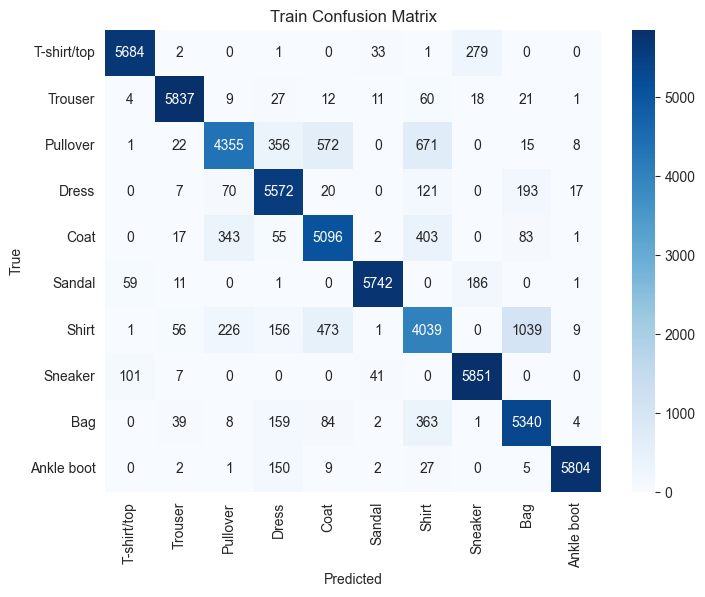

1875/1875 [==============================] - 3s 2ms/step
Train Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.97      0.95      0.96      6000
     Trouser       0.97      0.97      0.97      6000
    Pullover       0.87      0.73      0.79      6000
       Dress       0.86      0.93      0.89      6000
        Coat       0.81      0.85      0.83      6000
      Sandal       0.98      0.96      0.97      6000
       Shirt       0.71      0.67      0.69      6000
     Sneaker       0.92      0.98      0.95      6000
         Bag       0.80      0.89      0.84      6000
  Ankle boot       0.99      0.97      0.98      6000

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



In [270]:
image_classifier.plot_confusion_matrix('train')
image_classifier.show_results('train')


313/313 [==============================] - 1s 2ms/step


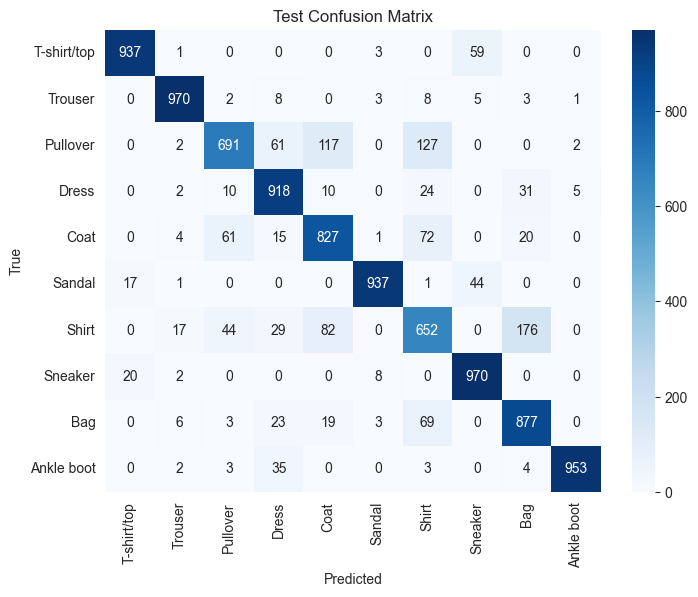

313/313 [==============================] - 1s 2ms/step
Test Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.94      0.95      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.85      0.69      0.76      1000
       Dress       0.84      0.92      0.88      1000
        Coat       0.78      0.83      0.80      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.68      0.65      0.67      1000
     Sneaker       0.90      0.97      0.93      1000
         Bag       0.79      0.88      0.83      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [271]:
image_classifier.plot_confusion_matrix('test')
image_classifier.show_results('test')

## Prediction

In [ ]:
def plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index):
    sample = x_test[sample_index]
    sample = np.expand_dims(sample, 0)
    pred_prob = model.predict(sample)
    y_pred = np.argmax(pred_prob)
    y_true = np.argmax(y_test[sample_index])

    # Plot the sample image
    plt.figure(figsize=(4, 4))
    plt.imshow(sample[0], cmap='gray')
    plt.title(f'Actual: {classes[y_true]}\nPredicted: {classes[y_pred]}')
    plt.axis('off')
    plt.show()

# Example usage:
# sample_index = 13  # Replace with the index of the sample you want to visualize
# plot_sample_with_prediction(model1, x_test, y_test, classes, sample_index)


1/1 [==============================] - 0s 22ms/step


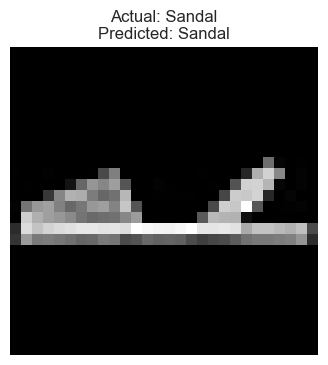

In [287]:
plot_sample_with_prediction(model1, x_test, y_test, classes, 111)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___